In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, log_loss, make_scorer
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn

In [2]:
df = pd.read_csv('loan.csv')
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670.0,36,4891.67,6000
11,19.72,670.0,36,3575.00,2000
12,14.27,665.0,36,4250.00,10625
13,21.67,670.0,60,14166.67,28000
21,21.98,665.0,36,6666.67,22000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 6 to 2497
Data columns (total 5 columns):
Interest.Rate     2497 non-null float64
FICO.Score        2499 non-null float64
Loan.Length       2500 non-null int64
Monthly.Income    2495 non-null float64
Loan.Amount       2500 non-null int64
dtypes: float64(3), int64(2)
memory usage: 117.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2497.0,13.067521,4.180074,5.42,10.16,13.11,15.8,24.89
FICO.Score,2499.0,705.870348,35.029051,640.00,680.00,700.00,725.0,830.00
Loan.Length,2500.0,41.260800,9.930893,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2495.0,5690.259599,3964.704795,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2500.0,12406.500000,7801.544872,1000.00,6000.00,10000.00,17000.0,35000.00


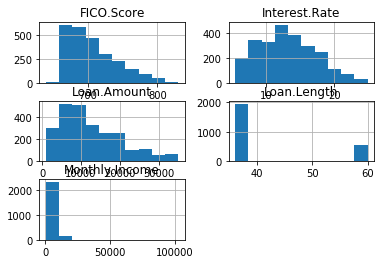

In [6]:
df.hist();

In [8]:
df['Monthly.Income'].sort_values()

1687       588.50
986        666.67
2181       833.33
867        866.67
376        884.90
901       1000.00
408       1000.00
772       1000.00
893       1000.00
580       1083.33
2335      1084.00
141       1100.00
1565      1100.00
57        1100.00
799       1125.00
940       1200.00
905       1200.00
1343      1200.00
2022      1250.00
1899      1280.00
1923      1300.00
2092      1312.08
223       1333.33
2071      1375.00
439       1403.33
1304      1416.67
571       1471.00
1639      1482.92
228       1500.00
633       1500.00
          ...    
917      18750.00
1939     18750.00
896      18750.00
1312     18750.00
2178     18750.00
1894     19166.67
1006     19583.00
2461     19583.33
1031     20000.00
2048     20416.67
2138     20833.33
1390     20833.33
1696     20833.33
473      20833.33
1400     21666.67
1319     22916.67
771      22916.67
1229     25000.00
214      25000.00
2478     25000.00
1659     25000.00
1427     27083.33
1999     39583.33
268      65000.00
1852    10